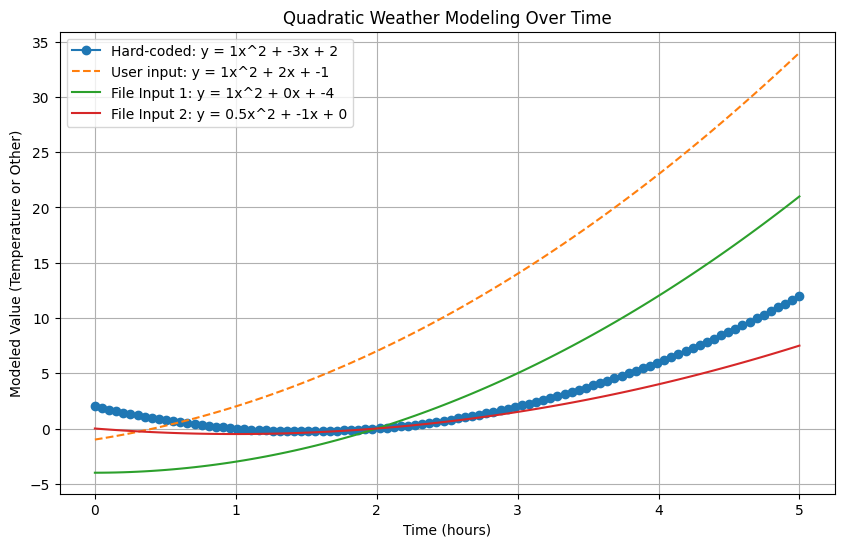

In [1]:
BU22CSEN0102059
import numpy as np
import matplotlib.pyplot as plt
import json
import os

# Function to compute quadratic values
def quadratic_model(a, b, c, x_range):
    x = np.linspace(x_range[0], x_range[1], 100)
    y = a * x**2 + b * x + c
    return x, y

# 1. Stage 1: Hard-coded variables
a, b, c = 1, -3, 2  # Coefficients for y = x^2 - 3x + 2
x_range = (0, 5)  # Time range for simulation (0 to 5 hours)

x1, y1 = quadratic_model(a, b, c, x_range)

# 2. Stage 2: User input (simulated for simplicity here)
user_a, user_b, user_c = 1, 2, -1  # Example user inputs
x2, y2 = quadratic_model(user_a, user_b, user_c, x_range)

# 3. Stage 3: Read from a file (simulated multiple inputs)
coefficients_list = [
    {"a": 1, "b": 0, "c": -4},  # Example 1: y = x^2 - 4
    {"a": 0.5, "b": -1, "c": 0},  # Example 2: y = 0.5x^2 - x
]
results = []

for coeff in coefficients_list:
    x, y = quadratic_model(coeff["a"], coeff["b"], coeff["c"], x_range)
    results.append({"x": x.tolist(), "y": y.tolist()})

# Ensure the directory exists
output_dir = '/mnt/data/'
os.makedirs(output_dir, exist_ok=True)

# Save results to a file
file_path = os.path.join(output_dir, 'quadratic_results.json')
with open(file_path, 'w') as f:
    json.dump(results, f)

# Plotting all results
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, label=f'Hard-coded: y = {a}x^2 + {b}x + {c}', marker='o')
plt.plot(x2, y2, label=f'User input: y = {user_a}x^2 + {user_b}x + {user_c}', linestyle='--')

for idx, coeff in enumerate(coefficients_list):
    x, y = np.array(results[idx]["x"]), np.array(results[idx]["y"])
    plt.plot(x, y, label=f'File Input {idx + 1}: y = {coeff["a"]}x^2 + {coeff["b"]}x + {coeff["c"]}')

plt.title("Quadratic Weather Modeling Over Time")
plt.xlabel("Time (hours)")
plt.ylabel("Modeled Value (Temperature or Other)")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'quadratic_model_plot.png'))
plt.show()
